In [7]:
import gower
from sklearn.cluster import AgglomerativeClustering
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [8]:
df = pd.read_csv("datasets/breast-cancer.csv")
df.drop(["Class"], axis=1, inplace=True)
df

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...
281,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,40-49,ge40,30-34,3-5,no,3,left,left_low,no


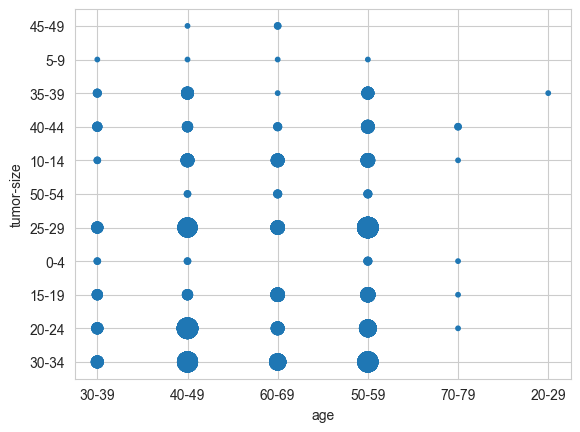

In [9]:
fig, ax = plt.subplots()

x = df["age"]
y = df["tumor-size"]
c = Counter(zip(x,y))
sizes = [10*c[(x1,y1)] for x1,y1 in zip(x,y)]

ax.scatter(x, y, s=sizes)
ax.set_xlabel("age")
ax.set_ylabel("tumor-size")

plt.show()

In [10]:
distance_matrix = gower.gower_matrix(df)
distance_matrix

array([[0.        , 0.5       , 0.2777778 , ..., 0.6666667 , 0.33333334,
        0.33333334],
       [0.5       , 0.        , 0.22222222, ..., 0.3888889 , 0.6111111 ,
        0.7222222 ],
       [0.2777778 , 0.22222222, 0.        , ..., 0.5       , 0.3888889 ,
        0.5       ],
       ...,
       [0.6666667 , 0.3888889 , 0.5       , ..., 0.        , 0.6666667 ,
        0.6666667 ],
       [0.33333334, 0.6111111 , 0.3888889 , ..., 0.6666667 , 0.        ,
        0.11111111],
       [0.33333334, 0.7222222 , 0.5       , ..., 0.6666667 , 0.11111111,
        0.        ]], dtype=float32)

In [11]:
model = AgglomerativeClustering(n_clusters=2, metric="precomputed", linkage="single").fit(distance_matrix)
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

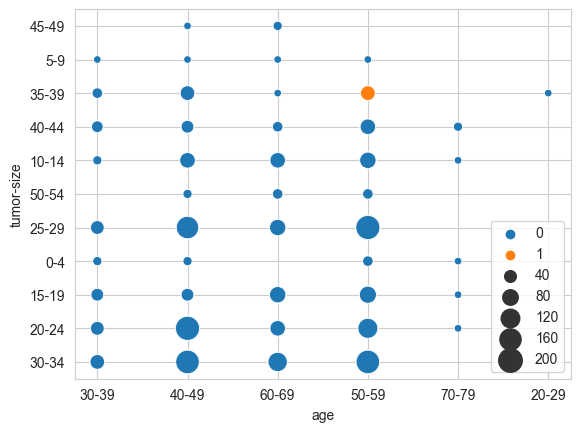

In [12]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=df, x="age", y="tumor-size", hue=model.labels_, size=sizes, sizes=(30, 300)).invert_yaxis();